# What Makes a Classic?

This notebook analyses a selection of classic and non-classic novels, exploring linguistic patterns that may distinguish classics from other literature. The goal is to investigate features such as vocabulary richness, sentence structure, and word usage that could contribute to a book being considered a “classic.”

## Overview

- Cleaning and preprocessing text from Project Gutenberg novels
- Calculating vocabulary richness and the proportion of unique and rare words
- Measuring average sentence length and distribution of sentence structures
- Visualising word distributions and comparing classics versus non-classics

### Aims

- Understand linguistic differences between classic and non-classic novels.
- Quantify vocabulary richness and rare word usage across books.
- Analyse sentence length patterns to assess structural complexity.
- Identify word usage patterns that may characterise classics.
---

# Cleaning the Data

First we must create a function called 'clean_text' to extract the main body of text and remove any text that is not a part of the original novel such as mention of Project Gutenberg using re.search(). Then the text is stripped of any extra spaces and punctuation is removed using string.punctuate and .translate() before returning the text as a string.

In [48]:
import string
import re

def clean_text(file_path):
    """
    Cleans a Gutenberg text file:
    1. Keeps only the text between "*** START" and "*** END" markers
    2. Removes lines containing 'gutenberg', 'ebook', or 'produced by'
    3. Converts text to lowercase
    4. Removes punctuation, including quotes and other extra symbols
    Returns cleaned text as a string.
    """
    with open(file_path, "r", encoding="utf-8") as f:
        text = f.read()
    
    # Step 1: Extract between START and END markers
    start_match = re.search(r"\*\*\* START.*\*\*\*", text, re.IGNORECASE)
    end_match = re.search(r"\*\*\* END.*\*\*\*", text, re.IGNORECASE)
    if start_match and end_match:
        text = text[start_match.end():end_match.start()]
    
    # Step 2: Remove lines mentioning Gutenberg/ebook/licence
    cleaned_lines = []
    for line in text.splitlines():
        if not re.search(r"(gutenberg|ebook|produced by|license|www)", line, re.IGNORECASE):
            cleaned_lines.append(line)
    
    text = " ".join(cleaned_lines).strip()
    
    # Step 3: Lowercase
    text = text.lower()
    
    # Step 4: Remove punctuation + quotes + special symbols
    extra_chars = '“”‘’—–…'  # common Gutenberg quotes/dashes
    all_punc = string.punctuation + extra_chars
    text = text.translate(str.maketrans("", "", all_punc))
    
    return text

The following code then loops through the books, constructs file paths using os.path.join() and applies the cleaning function to each book.

In [49]:
import os

# Folders
input_folder = "data"
output_folder = "clean"
os.makedirs(output_folder, exist_ok=True)

# Dictionaries of books
books = {
    "classics": [
        "dracula.txt",
        "crime_and_punishment.txt",
        "mrs_dalloway.txt",
        "great_gatsby.txt",
        "sherlock_memoirs.txt"
    ],
    "non_classics": [
        "haunted_bookshop.txt",
        "house_of_mirth.txt",
        "sister_carrie.txt",
        "joanna_godden.txt",
        "the_wrecker.txt"
    ]
}

# Loop through categories and files
for category, file_list in books.items():
    category_input_folder = os.path.join(input_folder, category)
    category_output_folder = os.path.join(output_folder, category)
    os.makedirs(category_output_folder, exist_ok=True)

    for filename in file_list:
        input_path = os.path.join(category_input_folder, filename)
        output_path = os.path.join(category_output_folder, filename.replace(".txt", "_clean.txt"))
        
        clean_content = clean_text(input_path)  # Call the function
        
        with open(output_path, "w", encoding="utf-8") as f:
            f.write(clean_content)

In order to gain context for future data, we must calculate the total number of words per book and this can be done by splitting the cleaned text using .split() then using the .len() function

In [50]:
# Loop through categories and files
for category, file_list in books.items():
    print(f"\n--- {category.upper()} ---")
    for filename in file_list:
        clean_path = os.path.join(output_folder, category, filename.replace(".txt", "_clean.txt"))
        
        with open(clean_path, "r", encoding="utf-8") as f:
            text = f.read()
        
        total_words = len(text.split())
        print(f"{filename}: {total_words} words")


--- CLASSICS ---
dracula.txt: 160629 words
crime_and_punishment.txt: 203420 words
mrs_dalloway.txt: 63518 words
great_gatsby.txt: 48106 words
sherlock_memoirs.txt: 95468 words

--- NON_CLASSICS ---
haunted_bookshop.txt: 61465 words
house_of_mirth.txt: 129121 words
sister_carrie.txt: 156408 words
joanna_godden.txt: 113183 words
the_wrecker.txt: 138253 words


---
# Word-Level Complexity

1. **Word frequency**


We can determine the words that are used most per book excluding stopwords ('the', 'and', 'to', etc.) by downloading the english stopwords corpus using nltk.download("stopwords"). Then a function can be made where the text is split using .split() and stopwords are removed before using the Counter() function to count how many times each word appears.

In [67]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

stop_words = set(stopwords.words("english"))

from collections import Counter

def get_word_frequencies(text, n=20):
    """
    Returns the n most common words in the text,
    excluding stopwords.
    """
    words = text.split()
    words = [w for w in words if w not in stop_words]  # remove stopwords
    word_counts = Counter(words)
    return word_counts.most_common(n)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elias\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [68]:
from wordcloud import WordCloud 
def create_wordcloud(text):
    """
    Returns a WordCloud object for given text.
    """
    wc = WordCloud(
        width=400,
        height=400,
        background_color="white",
        stopwords=stop_words
    ).generate(text)
    return wc

In [69]:
# Combine classics and non-classics in one dict for plotting
all_books = {
    "Dracula": "clean/classics/dracula_clean.txt",
    "Crime and Punishment": "clean/classics/crime_and_punishment_clean.txt",
    "Mrs Dalloway": "clean/classics/mrs_dalloway_clean.txt",
    "The Great Gatsby": "clean/classics/great_gatsby_clean.txt",
    "Sherlock Memoirs": "clean/classics/sherlock_memoirs_clean.txt",
    "Haunted Bookshop": "clean/non_classics/haunted_bookshop_clean.txt",
    "House of Mirth": "clean/non_classics/house_of_mirth_clean.txt",
    "Sister Carrie": "clean/non_classics/sister_carrie_clean.txt",
    "Joanna Godden": "clean/non_classics/joanna_godden_clean.txt",
    "The Wrecker": "clean/non_classics/the_wrecker_clean.txt"
}

# Read texts and create wordclouds
wordclouds = {}
for title, path in all_books.items():
    with open(path, "r", encoding="utf-8") as f:
        text = f.read()
    wordclouds[title] = create_wordcloud(text)


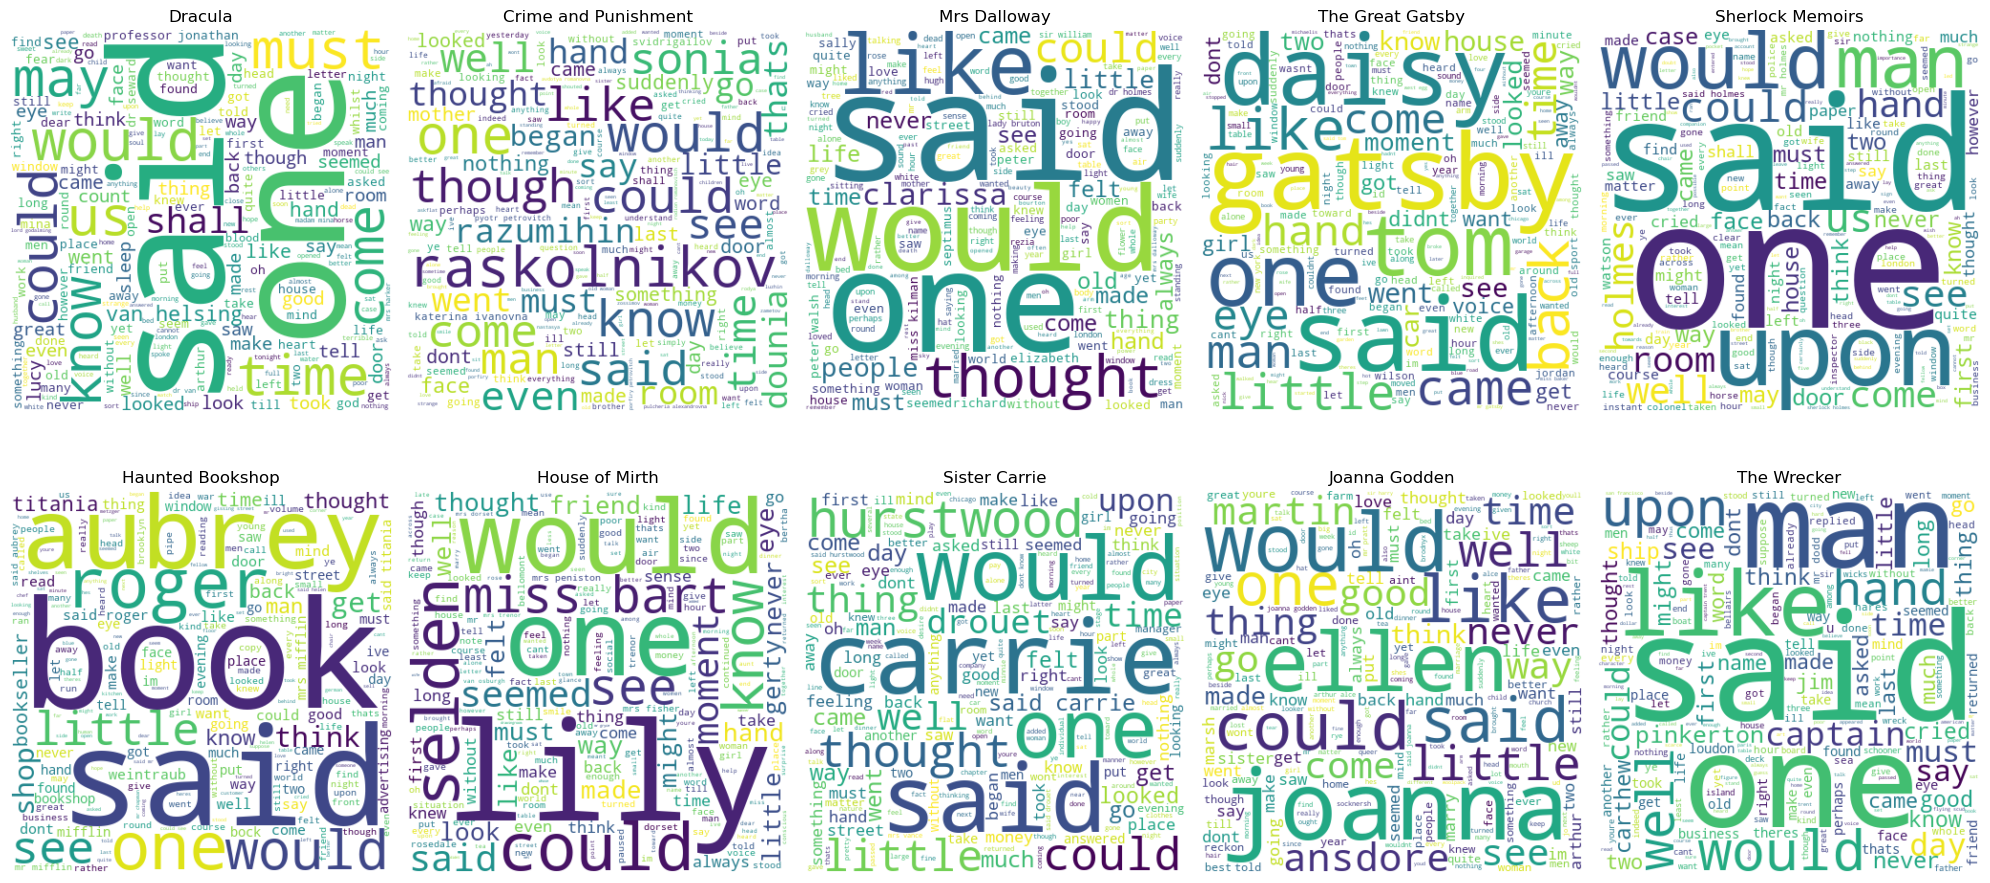

In [70]:
import matplotlib.pyplot as plt
# Plot 2 rows x 5 columns
fig, axes = plt.subplots(2, 5, figsize=(20,10))

for ax, (title, wc) in zip(axes.flatten(), wordclouds.items()):
    ax.imshow(wc, interpolation="bilinear")
    ax.axis("off")
    ax.set_title(title, fontsize=12)

plt.tight_layout()
plt.show()


**Word Frequecy Word Cloud Analysis**

The word clouds generated from the texts show that the most frequent words are predominantly short, simple words such as said, come, and little. Additionally, character names and other book-specific proper nouns appear very frequently. However, there is little evidence of words associated with overarching themes or moods, suggesting that high-frequency words in these novels are largely functional or narrative-specific rather than thematic and this does not vary between 'Classics' and 'Non-Classics'.

---
2. **Average Word Length**

We first must define a function that can split the text into words and then calculate the length of each word using .len() and the divide the total number characters by the total number of words. This function can be applied to every book using the previously defined all_books dictionary and then storing the results in avg_lengths dictionary allowing us create a bar plot of the average word length per book.

In [56]:
def average_word_length(text):
    """
    Returns the average word length in a text.
    """
    words = text.split()
    if len(words) == 0:
        return 0
    return sum(len(word) for word in words) / len(words)

In [74]:
avg_lengths = {}

for title, path in all_books.items():
    with open(path, "r", encoding="utf-8") as f:
        text = f.read()
    avg_lengths[title] = average_word_length(text)

# Convert to DataFrame for easier viewing
import pandas as pd
df_avg_lengths = pd.DataFrame(list(avg_lengths.items()), columns=["Book", "Avg_Word_Length"])
df_avg_lengths = df_avg_lengths.sort_values(by="Avg_Word_Length", ascending=False)

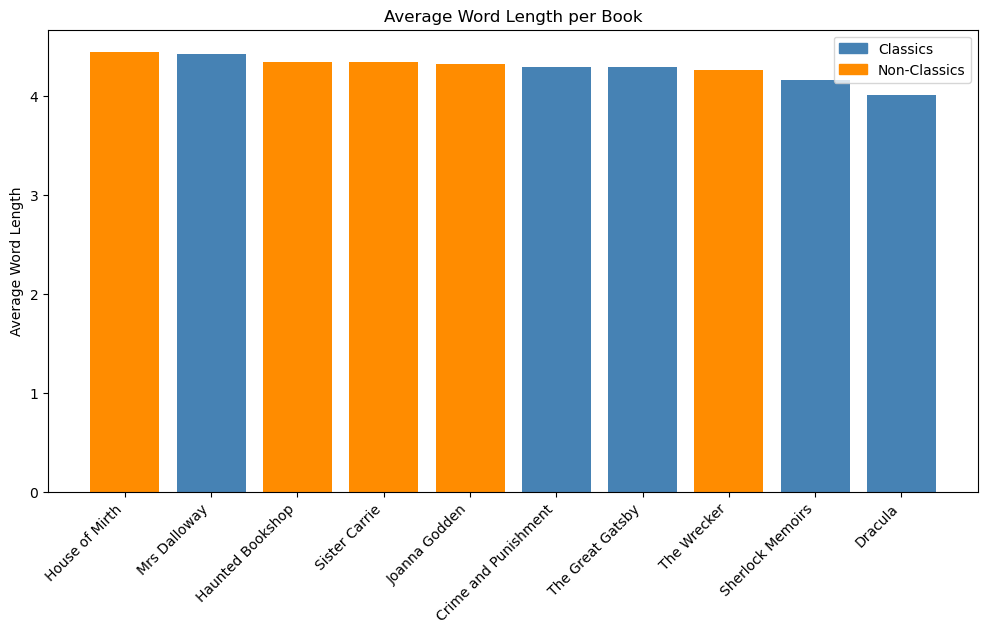

In [75]:
# Define colours based on category
colors = []
for book in df_avg_lengths["Book"]:
    if book in ["Dracula", "Crime and Punishment", "Mrs Dalloway", "The Great Gatsby", "Sherlock Memoirs"]:
        colors.append("steelblue")  # classics
    else:
        colors.append("darkorange")      # non-classics

plt.figure(figsize=(12,6))
bars = plt.bar(df_avg_lengths["Book"], df_avg_lengths["Avg_Word_Length"], color=colors)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Word Length")
plt.title("Average Word Length per Book")

# Add custom legend
import matplotlib.patches as mpatches
classic_patch = mpatches.Patch(color="steelblue", label="Classics")
nonclassic_patch = mpatches.Patch(color="darkorange", label="Non-Classics")
plt.legend(handles=[classic_patch, nonclassic_patch])

plt.show()

**Average Word Length Analysis**

The average word length across the books ranges from approximately 4.0 to 4.45 characters per word. House of Mirth and Mrs Dalloway have the highest average word lengths, suggesting slightly more complex or longer word usage, while Dracula and Sherlock Memoirs have the lowest, indicating a simpler or more straightforward vocabulary. Overall, there is relatively little variation between classics and non-classics, suggesting that average word length alone may not strongly distinguish the two categories

---

# Sentence-Level Complexity

1. **Average Sentence Length**

In order to find the average sentence length we must find a way to recognise the beginning and end of a sentence, to do this the original data must be cleaned again but this time leaving any sentence ending punctuation such as . , ? , !

In [59]:
def clean_text_sentences(file_path):
    """
    Cleans a Gutenberg text file for sentence-level analysis:
    1. Keeps only the text between "*** START" and "*** END" markers
    2. Removes lines containing 'gutenberg', 'ebook', or 'produced by'
    3. Converts text to lowercase
    4. Removes punctuation except for sentence-ending punctuation (. ! ?)
       and speech marks ( " ' “ ” ‘ ’ )
    Returns cleaned text as a string.
    """
    with open(file_path, "r", encoding="utf-8") as f:
        text = f.read()
    
    # Step 1: Extract between START and END markers
    start_match = re.search(r"\*\*\* START.*\*\*\*", text, re.IGNORECASE)
    end_match = re.search(r"\*\*\* END.*\*\*\*", text, re.IGNORECASE)
    if start_match and end_match:
        text = text[start_match.end():end_match.start()]
    
    # Step 2: Remove lines mentioning Gutenberg/ebook/license
    cleaned_lines = []
    for line in text.splitlines():
        if not re.search(r"(gutenberg|ebook|produced by|license|www)", line, re.IGNORECASE):
            cleaned_lines.append(line)
    text = " ".join(cleaned_lines).strip()
    
    # Step 3: Lowercase
    text = text.lower()
    
    # Step 4: Remove punctuation, but keep . ! ? and quotes
    extra_chars = '—–…'  # remove long dashes/ellipses
    all_punc = (
        string.punctuation.replace(".", "")
                         .replace("!", "")
                         .replace("?", "")
        ) + extra_chars
    text = text.translate(str.maketrans("", "", all_punc))
    
    return text

In [60]:
output_folder_sentences = "clean_sentences"
os.makedirs(output_folder_sentences, exist_ok=True)

for category, file_list in books.items():
    category_input_folder = os.path.join(input_folder, category)
    category_output_folder = os.path.join(output_folder_sentences, category)
    os.makedirs(category_output_folder, exist_ok=True)

    for filename in file_list:
        input_path = os.path.join(category_input_folder, filename)
        output_path = os.path.join(category_output_folder, filename.replace(".txt", "_clean_sentences.txt"))
        
        clean_content = clean_text_sentences(input_path)
        
        with open(output_path, "w", encoding="utf-8") as f:
            f.write(clean_content)

Then a function can be defined to calculate the average sentence length by splitting the data into sentences using punctuation marks with re.split() and removing any empty spaces before counting the number of words in each of these sentences.

In [61]:
def average_sentence_length(file_path):
    """
    Returns the average sentence length (in words) for a book.
    Uses sentence-preserved cleaned text (with . ! ? intact).
    """
    with open(file_path, "r", encoding="utf-8") as f:
        text = f.read()
    
    # Split text into sentences using punctuation
    sentences = re.split(r'[.!?]+', text)
    
    # Remove empty sentences
    sentences = [s.strip() for s in sentences if len(s.strip()) > 0]
    
    # Count words per sentence
    words_per_sentence = [len(s.split()) for s in sentences]
    
    if len(words_per_sentence) == 0:
        return 0
    
    return sum(words_per_sentence) / len(words_per_sentence)

The previously defined function can be looped through the all_books dictionary and create a new dictionary avg_sentence_lengths

In [79]:
avg_sentence_lengths = {}

for title, path in all_books.items():
    # Use sentence-preserved cleaned data
    sentence_file = path.replace("clean", "clean_sentences")  # adjust path
    avg_sentence_lengths[title] = average_sentence_length(sentence_file)

# Convert to DataFrame for easier viewing
df_sentences = pd.DataFrame(list(avg_sentence_lengths.items()), columns=["Book", "Avg_Sentence_Length"])
df_sentences = df_sentences.sort_values(by="Avg_Sentence_Length", ascending=False)

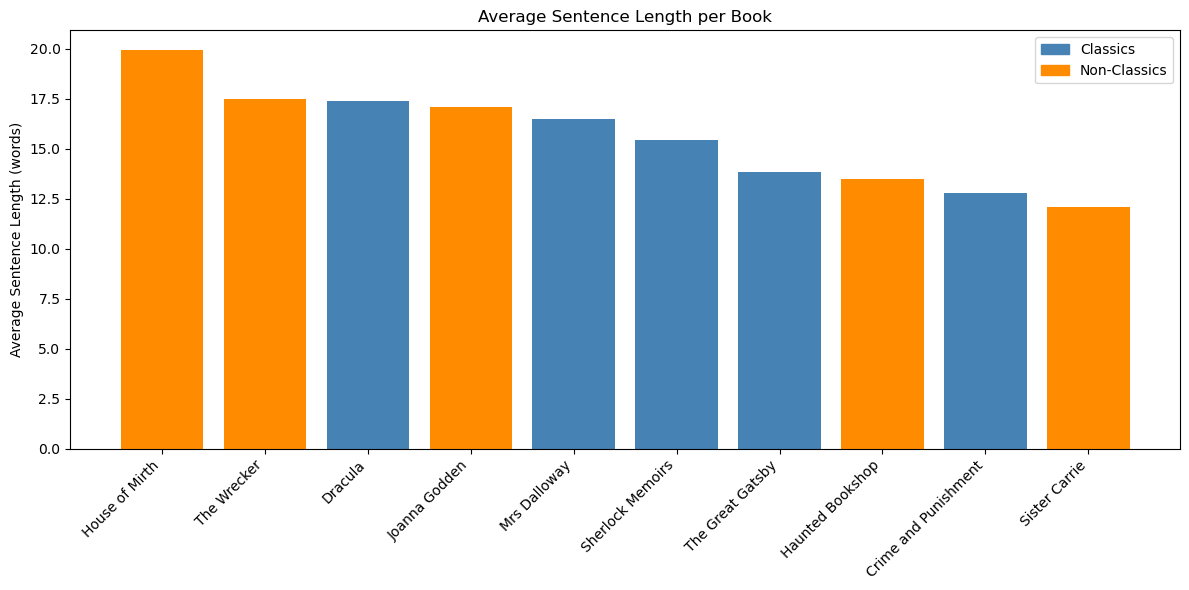

In [63]:
colors = ["steelblue" if book in classics_books else "darkorange" for book in df_sentences["Book"]]

plt.figure(figsize=(12,6))
bars = plt.bar(df_sentences["Book"], df_sentences["Avg_Sentence_Length"], color=colors)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Sentence Length (words)")
plt.title("Average Sentence Length per Book")

# Add legend
classic_patch = mpatches.Patch(color="steelblue", label="Classics")
nonclassic_patch = mpatches.Patch(color="darkorange", label="Non-Classics")
plt.legend(handles=[classic_patch, nonclassic_patch])

plt.tight_layout()
plt.show()

**Average Sentence Length Analysis**

The average sentence length varies noticeably across the books, ranging from around 12 words per sentence (Sister Carrie) to nearly 20 words per sentence (House of Mirth). Longer sentences are observed in House of Mirth, The Wrecker, and Dracula, suggesting more complex or elaborate sentence structures, while shorter sentences appear in Crime and Punishment, Sister Carrie, and Haunted Bookshop, indicating simpler or more direct phrasing. Overall, classics and non-classics both show a range of sentence lengths, though the longest sentences tend to appear in non-classics in this dataset. Classics tend to have shorter, more concise sentences, which could mean improved readability and pacing while allowing authors to convey complex ideas efficiently. This clarity and stylistic precision may contribute to their enduring popularity.

# Vocabulary Richness

1. **How many words appear in Classics but not in Non-Classics?**

To identify words unique to Classics (and likewise unique to Non-Classics), the analysis follows three main steps:

1. Define a function to read a text file, split it into words, convert the words into a set, and remove common stopwords
2. Create sets containing all words across the Classics and Non-Classics book lists
3. Subtract the words in Non-Classics from those in Classics; the remaining words are considered unique to the Classics. The same is done in reverse to find words unique to Non-Classics

The words only found in one category or 'unique' to that category can then be plotted as a percentage of the total words used in that category.

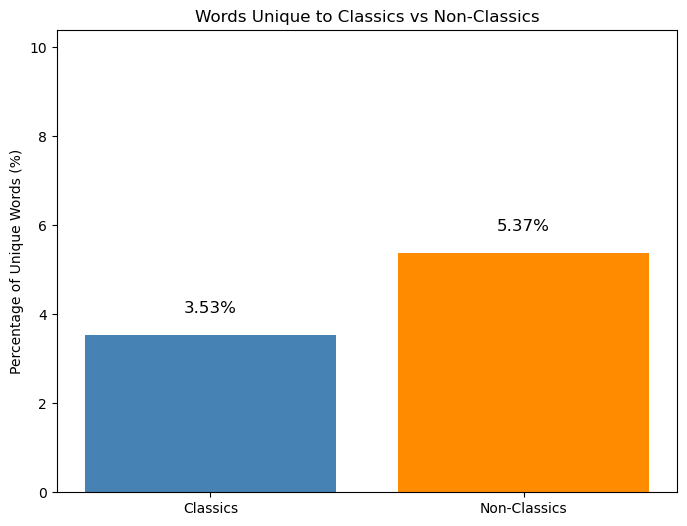

In [64]:
# Function to get set of words from a book
def get_words(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        text = f.read()
    words = set(text.split())
    # Remove stopwords to focus on meaningful words
    return words - stop_words

# Get words for classics
classics_books = ["Dracula", "Crime and Punishment", "Mrs Dalloway", "The Great Gatsby", "Sherlock Memoirs"]
non_classics_books = ["Haunted Bookshop", "House of Mirth", "Sister Carrie", "Joanna Godden", "The Wrecker"]

classics_words = set()
for book in classics_books:
    classics_words |= get_words(all_books[book])  # union of all classics

non_classics_words = set()
for book in non_classics_books:
    non_classics_words |= get_words(all_books[book])  # union of all non-classics

unique_classics = classics_words - non_classics_words
unique_non_classics = non_classics_words - classics_words

def total_words(book_list):
    """
    Returns the total number of words across a list of books,
    excluding stopwords.
    """
    total = 0
    for book in book_list:
        with open(all_books[book], "r", encoding="utf-8") as f:
            text = f.read()
        words = [w for w in text.split() if w not in stop_words]
        total += len(words)
    return total
    
total_classics_words = total_words(classics_books)
total_non_classics_words = total_words(non_classics_books)
percent_unique_classics = len(unique_classics) / total_classics_words * 100
percent_unique_non_classics = len(unique_non_classics) / total_non_classics_words * 100

categories = ["Classics", "Non-Classics"]
percentages = [percent_unique_classics, percent_unique_non_classics]
colors = ["steelblue", "darkorange"]
plt.figure(figsize=(8,6))
plt.bar(categories, percentages, color=colors)
plt.ylabel("Percentage of Unique Words (%)")
plt.title("Words Unique to Classics vs Non-Classics")
plt.ylim(0, max(percentages)+5)  # add a little space at top

# Add exact percentage labels on top of bars
for i, p in enumerate(percentages):
    plt.text(i, p + 0.5, f"{p:.2f}%", ha="center", fontsize=12)

plt.show()

**Observations**

Non-Classics have slightly more unique words than Classics, with almost 2 percentage points higher in terms of vocabulary not shared with the other category. This suggests that non-classics in this dataset may use a slightly more diverse or varied vocabulary relative to their total word count.

---
2. **Percentage of Unique Words Per Book**

While the previous plot showed words unique to each category of book, we can also explore the traditional literary definition of a unique word—a word that appears at least once in a single text, regardless of whether it appears in other books. This can help us understand how varied the language is in each book.

To do this we define a function similar to the previous get_word function but with one key difference, it keeps any duplicate words. This is important as we will be plotting the unique words as a percentage of the total words used. 

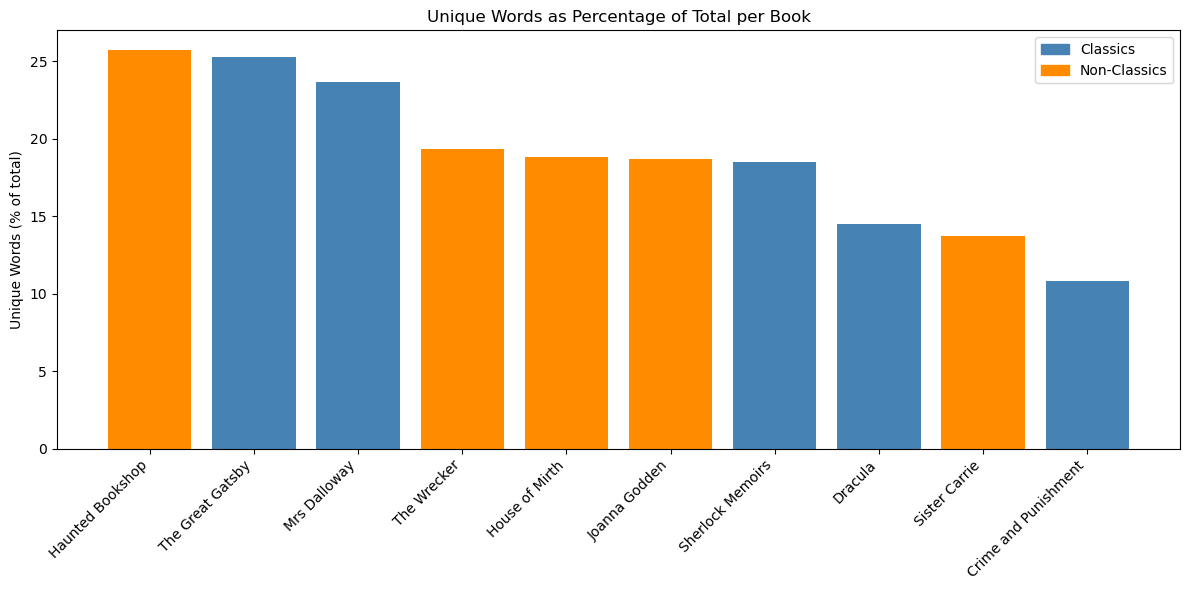

In [81]:
# Function to get cleaned words from a book (excluding stopwords)
def get_word_list(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        text = f.read()
    words = [w for w in text.split() if w not in stop_words]
    return words

# Calculate percentage of unique words for each book
unique_percentages = {}

for book, path in all_books.items():
    words = get_word_list(path)
    if len(words) > 0:
        unique_percentages[book] = len(set(words)) / len(words) * 100
    else:
        unique_percentages[book] = 0

# Convert to DataFrame
df_unique_pct = pd.DataFrame(list(unique_percentages.items()), columns=["Book", "Unique_Percentage"])
df_unique_pct = df_unique_pct.sort_values(by="Unique_Percentage", ascending=False)

# Plot bar chart
colors = ["steelblue" if book in classics_books else "darkorange" for book in df_unique_pct["Book"]]

plt.figure(figsize=(12,6))
plt.bar(df_unique_pct["Book"], df_unique_pct["Unique_Percentage"], color=colors)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Unique Words (% of total)")
plt.title("Unique Words as Percentage of Total per Book")

# Legend
classic_patch = mpatches.Patch(color="steelblue", label="Classics")
nonclassic_patch = mpatches.Patch(color="darkorange", label="Non-Classics")
plt.legend(handles=[classic_patch, nonclassic_patch])

plt.tight_layout()
plt.show()

**Unique Words Analysis**

The percentage of unique words relative to total words varies across the books. Some Non-Classics, such as Haunted Bookshop (25.7%), exhibit the highest proportions of unique words, indicating a relatively varied vocabulary for their length. Certain Classics like Dracula (14.5%) and Crime and Punishment (10.8%) show lower percentages, suggesting more repetition in word usage. This pattern implies that while vocabulary richness provides insight into word diversity, a lower percentage of unique words in Classics may contribute to greater readability and narrative cohesion, potentially explaining part of their enduring popularity.


---
**3. How many Rare Words (Hapax Legomena) does each book have?**

Another measure of vocabulary richness is the number of rare words, also called hapax legomena, which are words that appear only once in a text.

The following code defines a function rare_word_stats which counts total words, unique words, and words occurring only once. (hapax_count), then computes percentages relative to total words and unique words. The loop goes through all books in the books dictionary, reads the cleaned text, calls rare_word_stats, prints the results, and stores them in hapax_data


--- CLASSICS ---
dracula.txt: 5370 hapax (3.34% of total words, 51.00% of unique words)
crime_and_punishment.txt: 4454 hapax (2.19% of total words, 43.14% of unique words)
mrs_dalloway.txt: 4194 hapax (6.60% of total words, 54.71% of unique words)
great_gatsby.txt: 3521 hapax (7.32% of total words, 56.15% of unique words)
sherlock_memoirs.txt: 3854 hapax (4.04% of total words, 48.58% of unique words)

--- NON_CLASSICS ---
haunted_bookshop.txt: 4591 hapax (7.47% of total words, 55.78% of unique words)
house_of_mirth.txt: 5950 hapax (4.61% of total words, 50.38% of unique words)
sister_carrie.txt: 4961 hapax (3.17% of total words, 46.79% of unique words)
joanna_godden.txt: 5860 hapax (5.18% of total words, 55.05% of unique words)
the_wrecker.txt: 6684 hapax (4.83% of total words, 50.96% of unique words)


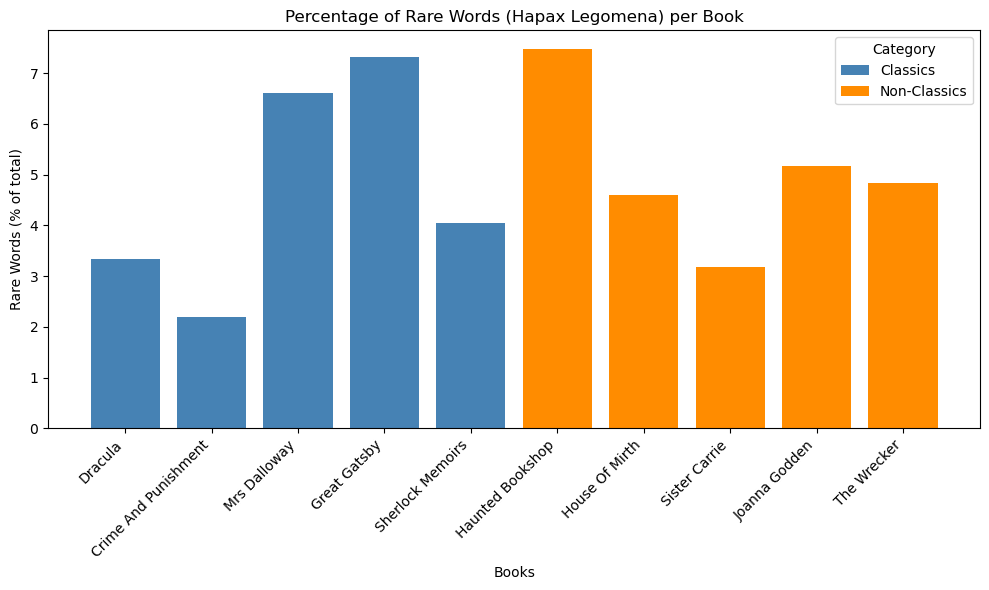

In [66]:
from matplotlib.patches import Patch
def rare_word_stats(text):
    """
    Calculates rare word stats:
    1. Count words that appear only once (hapax legomena)
    2. Return percentage relative to total unique words
    3. Return percentage relative to total words
    """
    words = text.split()
    counts = Counter(words)
    
    hapax = [w for w, c in counts.items() if c == 1]
    
    total_words = len(words)
    unique_words = len(counts)
    hapax_count = len(hapax)
    
    return {
        "hapax_count": hapax_count,
        "unique_words": unique_words,
        "total_words": total_words,
        "hapax_percentage_unique": hapax_count / unique_words * 100 if unique_words > 0 else 0,
        "hapax_percentage_total": hapax_count / total_words * 100 if total_words > 0 else 0
    }

# Collect data for plotting
hapax_data = []

for category, file_list in books.items():
    print(f"\n--- {category.upper()} ---")
    for filename in file_list:
        path = os.path.join("clean", category, filename.replace(".txt", "_clean.txt"))
        with open(path, "r", encoding="utf-8") as f:
            text = f.read()
        stats = rare_word_stats(text)
        print(f"{filename}: {stats['hapax_count']} hapax "
              f"({stats['hapax_percentage_total']:.2f}% of total words, "
              f"{stats['hapax_percentage_unique']:.2f}% of unique words)")
        
        # Store for plotting
        hapax_data.append({
            "book": filename.replace(".txt", ""),
            "hapax_percentage": stats["hapax_percentage_total"],
            "category": category
        })

# Convert to lists for plotting
books_list = [item["book"].replace("_", " ").title() for item in hapax_data]  
values = [item["hapax_percentage"] for item in hapax_data]
categories = [item["category"] for item in hapax_data]

# Assign colours
colors = ["steelblue" if cat == "classics" else "darkorange" for cat in categories]

# Create bar plot
plt.figure(figsize=(10,6))
bars = plt.bar(books_list, values, color=colors)

# Add labels
plt.xlabel("Books")
plt.ylabel("Rare Words (% of total)")
plt.title("Percentage of Rare Words (Hapax Legomena) per Book")

# Add legend
legend_elements = [
    Patch(facecolor="steelblue", label="Classics"),
    Patch(facecolor="darkorange", label="Non-Classics")
]
plt.legend(handles=legend_elements, title="Category")

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Rare Words Analysis**

Looking at both hapax legomena and unique word percentages reveals an interesting pattern. Non-classics tend to have slightly more unique words overall, but the proportion of words that appear only once (hapax) is similar between classics and non-classics. This suggests that while non-classics introduce more new words across the text, classics still make extensive use of words that appear only once, showing a careful and varied choice of vocabulary. In other words, unique words give a sense of the text’s overall breadth, while hapax words highlight the subtlety and sparing use of language that is often characteristic of classic literature.


# Summary 

Overall, there are few consistent differences between classic and non-classic books, and a wide range of variation exists between individual books within each category, likely reflecting author-specific style. Some patterns are noticeable in classics, such as shorter sentence length, slightly higher vocabulary richness, and a balance of common and rare words, which may make them easier to read and contribute to their popularity. However, these differences are subtle, suggesting that what truly makes a book a classic is likely deeper than measurable textual features alone.